## Fraud Detection

In [37]:
# import neccessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
import xgboost as xgb
import joblib
import time

### Import Dataset

In [38]:
df = pd.read_csv("fraud_detection.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [39]:
df.shape

(6362620, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [41]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [42]:
# check for unique values
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [43]:
# check for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Exploratory Data Analysis

In [44]:
x = (len(df[(df['isFraud']==1)])*100/len(df))
print(f"Percentage of Fraud tarnsactions in the data: {round(x, 2)}%")

Percentage of Fraud tarnsactions in the data: 0.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_17076\1416528982.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])


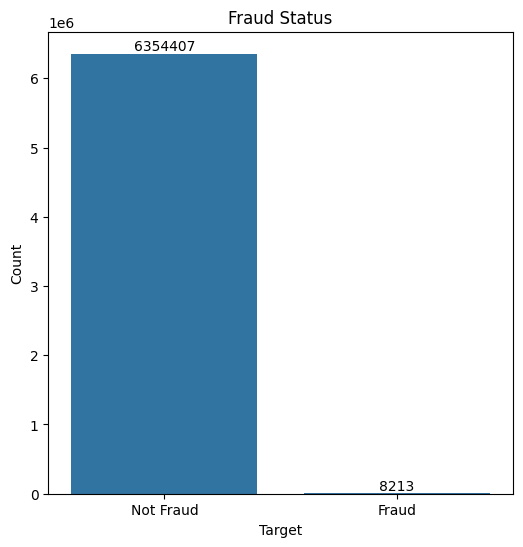

In [45]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='isFraud', data=df)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.title("Fraud Status")
plt.xlabel("Target")
plt.ylabel("Count")

for c in ax.containers:
    ax.bar_label(c, fmt='%d')
    
plt.show()

In [46]:
fraud_by_type = df.groupby('type')['isFraud'].count()
fraud_by_type

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: isFraud, dtype: int64

In [47]:
fraud_by_type = df.pivot_table(index='type', columns='isFraud', aggfunc='size', fill_value=0)
# aggfunc='count' counts all non-null values across all columns
# aggfunc='size' counts the number of rows for each combination of type and isFraud
fraud_by_type.columns = ['Not Fraud',  'Fraud']
fraud_by_type

,Not Fraud,Fraud
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


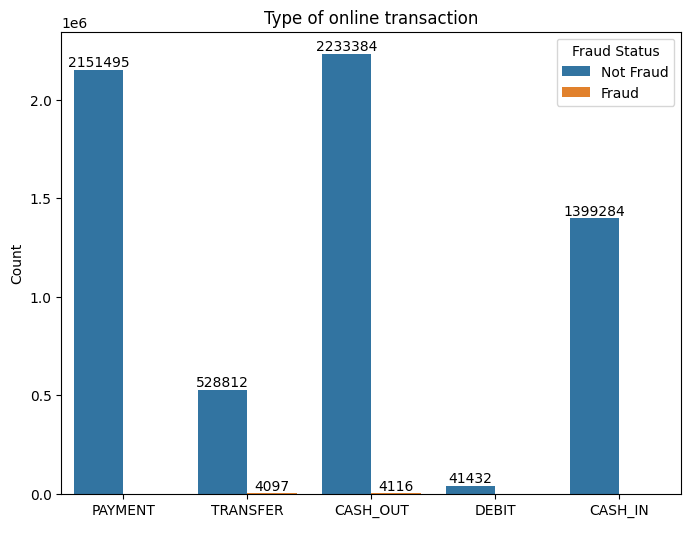

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Type of online transaction")
plt.xlabel(" ")
plt.ylabel("Count")
ax.legend(title="Fraud Status", labels=["Not Fraud", "Fraud"])  

# Add counts on top of each bar
for c in ax.containers:
    ax.bar_label(c, fmt='%d')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17076\3190404418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_df['balance_change'] = fraudulent_df['newbalanceOrig'] - fraudulent_df['oldbalanceOrg']


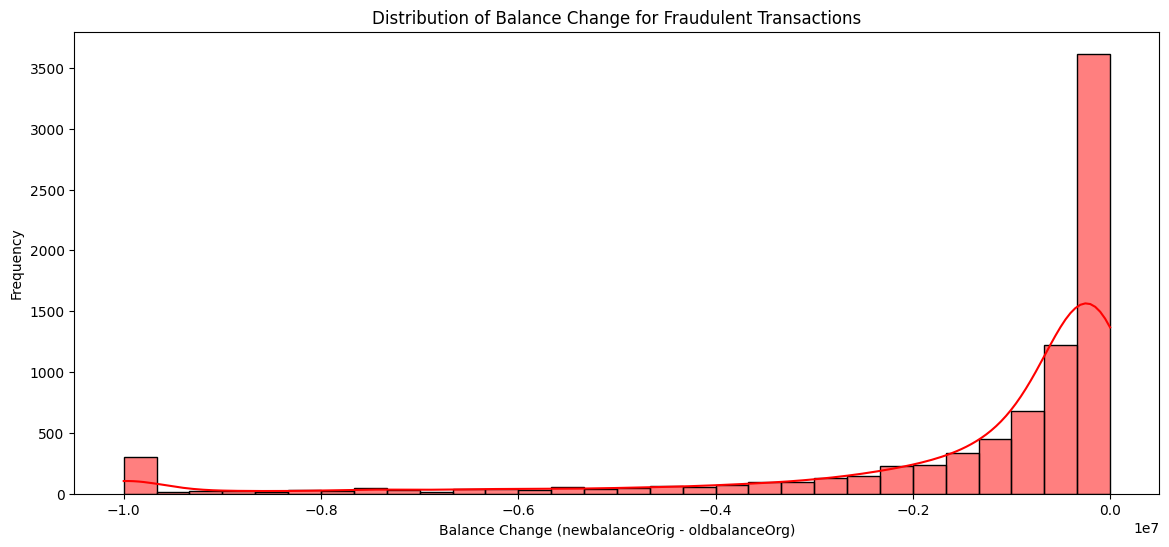

In [49]:
# Filter fraudulent transactions
fraudulent_df = df[df['isFraud'] == 1]

# Calculate the balance change
fraudulent_df['balance_change'] = fraudulent_df['newbalanceOrig'] - fraudulent_df['oldbalanceOrg']

# Plot the distribution of balance changes
plt.figure(figsize=(14, 6))
sns.histplot(fraudulent_df['balance_change'], kde=True, color='red', bins=30)
plt.title('Distribution of Balance Change for Fraudulent Transactions')
plt.xlabel('Balance Change (newbalanceOrig - oldbalanceOrg)')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Create a confusion matrix
conf_matrix = pd.crosstab(df['isFraud'], df['isFlaggedFraud'], rownames=['Is Fraud'], colnames=['IsFlaggedFraud'])
print(conf_matrix)


IsFlaggedFraud        0   1
Is Fraud                   
0               6354407   0
1                  8197  16


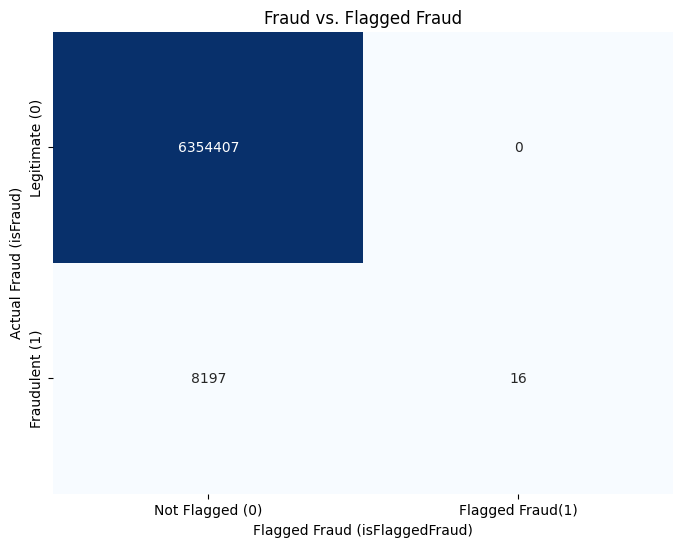

In [51]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Fraud vs. Flagged Fraud")
plt.ylabel("Actual Fraud (isFraud)")
plt.xlabel("Flagged Fraud (isFlaggedFraud)")

ax.xaxis.set_ticklabels(['Not Flagged (0)', 'Flagged Fraud(1)'], fontsize=10)
ax.yaxis.set_ticklabels(['Legitimate (0)', 'Fraudulent (1)'], fontsize=10)
plt.show()

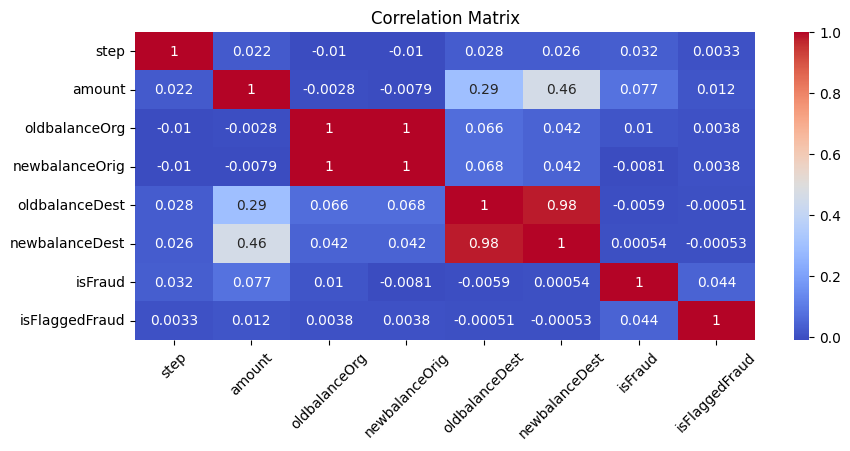

In [52]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', square=False)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()
           

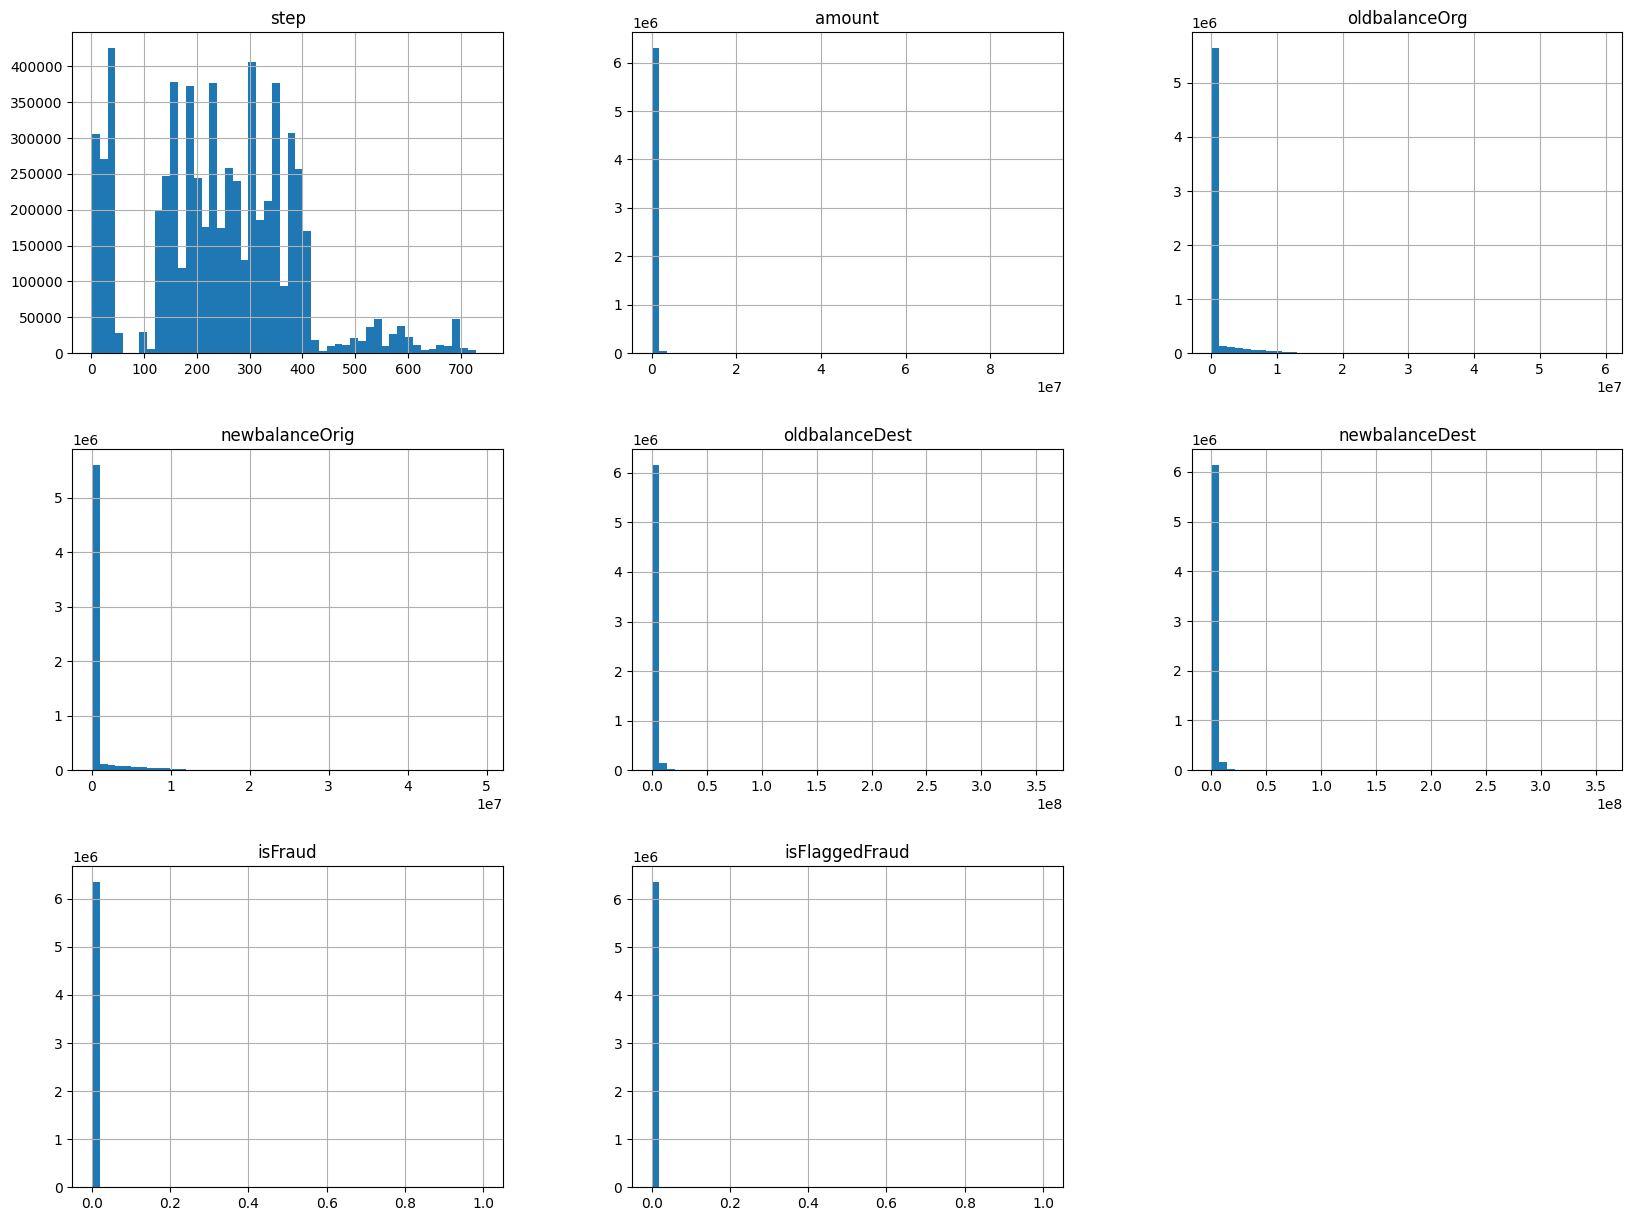

In [53]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

### Data Preprocessing

In [54]:
df = df.drop(['nameDest', 'nameOrig'], axis=1)
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [55]:
# Get the mapping of each numerical value to its category
type_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Category-to-Numerical Mapping:")
print(type_mapping)

Category-to-Numerical Mapping:
{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [21]:
X = df.drop(['isFraud'], axis=1)
Y = df['isFraud']

In [22]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

### Machine Learning Modeling

In [23]:
# Split data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [34]:
test_data_df = pd.DataFrame(X_test)
test_data_df['isFraud'] = y_test
test_data_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
3737323,278,0,330218.42,20866.00,351084.42,452419.57,122201.15,0,0
264914,15,3,11647.08,30370.00,18722.92,0.00,0.00,0,0
85647,10,0,152264.21,106589.00,258853.21,201303.01,49038.80,0,0
5899326,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0
2544263,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...
6201010,576,1,152332.80,30768.00,0.00,0.00,152332.80,0,0
4682236,331,1,170955.62,21325.00,0.00,0.00,170955.62,0,0
5398320,377,3,1198.78,22962.51,21763.74,0.00,0.00,0,0
5319864,374,3,33472.42,0.00,0.00,0.00,0.00,0,0


In [35]:
# Save the DataFrame to a CSV file
test_data_df.to_csv('fraud_detection_test_data.csv', index=False)

In [36]:
a = pd.read_csv("fraud_detection_test_data.csv")
a

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,278,0,330218.42,20866.00,351084.42,452419.57,122201.15,0,0
1,15,3,11647.08,30370.00,18722.92,0.00,0.00,0,0
2,10,0,152264.21,106589.00,258853.21,201303.01,49038.80,0,0
3,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0
4,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...
1908781,576,1,152332.80,30768.00,0.00,0.00,152332.80,0,0
1908782,331,1,170955.62,21325.00,0.00,0.00,170955.62,0,0
1908783,377,3,1198.78,22962.51,21763.74,0.00,0.00,0,0
1908784,374,3,33472.42,0.00,0.00,0.00,0.00,0,0


In [29]:
# Initialize a list to store results
model_results = []

# Define and train each classifier
classifiers = {    
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each classifier
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
     # Save the model
    joblib.dump(model, f'{model_name}_fraud_detection_model.pkl')

    print("Model saved as 'xgb_fraud_detection_model.pkl'")

    # Load the trained model
    model = joblib.load(f'{model_name}_fraud_detection_model.pkl')

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    elapsed_time = round(time.time() - start_time, 2)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Training Time (seconds)": elapsed_time
    })

# Create a DataFrame for results
results_df = pd.DataFrame(model_results)

# Display the summary results
print("\nSummary of Model Performance:")
print(results_df)



Training XGBoost...


e:\Data Science Bootcamp\DS_W1\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:03:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved as 'xgb_fraud_detection_model.pkl'

XGBoost Performance:
Accuracy: 0.9998
F1 Score: 0.9003
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.85      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786


Summary of Model Performance:
     Model  Accuracy  F1 Score  Training Time (seconds)
0  XGBoost   0.99976  0.900282                    29.93


In [ ]:
# Initialize a list to store results
model_results = []

# Define and train each classifier
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each classifier
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    elapsed_time = round(time.time() - start_time, 2)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Training Time (seconds)": elapsed_time
    })

# Create a DataFrame for results
results_df = pd.DataFrame(model_results)

# Display the summary results
print("\nSummary of Model Performance:")
print(results_df)



Training Logistic Regression...


e:\Data Science Bootcamp\DS_W1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.9983
F1 Score: 0.4172
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.38      0.47      0.42      2435

    accuracy                           1.00   1908786
   macro avg       0.69      0.73      0.71   1908786
weighted avg       1.00      1.00      1.00   1908786


Training Random Forest...

Random Forest Performance:
Accuracy: 0.9997
F1 Score: 0.8686
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786


Training Naive Bayes...

Naive Bayes Performance:
Accuracy: 0.9924
F1 Score: 0.0511
Classification Report:
              precision    recall  

e:\Data Science Bootcamp\DS_W1\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.9998
F1 Score: 0.9003
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.85      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786


Summary of Model Performance:
                 Model  Accuracy  F1 Score  Training Time (seconds)
0  Logistic Regression  0.998340  0.417219                    58.67
1        Random Forest  0.999699  0.868650                   519.79
2          Naive Bayes  0.992374  0.051108                     6.33
3              XGBoost  0.999760  0.900282                    47.38


In [26]:
# Define and train each classifier
classifiers = {
    "KNN_3_neighbors": KNeighborsClassifier(n_neighbors=3),
    "KNN_5_neighbors": KNeighborsClassifier(n_neighbors=5)  
    }

# Train and evaluate each classifier
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    elapsed_time = round(time.time() - start_time, 2)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Training Time (seconds)": elapsed_time
    })



Training KNN_3_neighbors...

KNN_3_neighbors Performance:
Accuracy: 0.9994
F1 Score: 0.7563
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.82      0.70      0.76      2435

    accuracy                           1.00   1908786
   macro avg       0.91      0.85      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786


Training KNN_5_neighbors...

KNN_5_neighbors Performance:
Accuracy: 0.9994
F1 Score: 0.7522
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.85      0.68      0.75      2435

    accuracy                           1.00   1908786
   macro avg       0.92      0.84      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:

# Create a DataFrame for results
results_df = pd.DataFrame(model_results)

# Display the summary results
print("\nSummary of Model Performance:")
print(results_df)




Summary of Model Performance:
                 Model  Accuracy  F1 Score  Training Time (seconds)
0  Logistic Regression  0.998340  0.417219                    58.67
1        Random Forest  0.999699  0.868650                   519.79
2          Naive Bayes  0.992374  0.051108                     6.33
3              XGBoost  0.999760  0.900282                    47.38
4      KNN_3_neighbors  0.999423  0.756303                   870.85
5      KNN_5_neighbors  0.999432  0.752227                   802.13


#### Modeling Insights
* Logistic Regression performed well in terms of accuracy but struggled with F1 score, indicating challenges in handling class imbalances.
* Random Forest achieved excellent F1 performance and accuracy, proving to be a robust model for fraud detection, albeit with a higher computational cost.
* Naive Bayes was computationally efficient but showed poor F1 performance, likely due to its strong assumptions and limitations in handling complex fraud patterns.
* XGBoost stood out with the highest F1 score and strong accuracy, offering an excellent balance of precision and recall. It also trained relatively quickly compared to other high-performing models.
* KNN showed good performance in accuracy and F1 score but had the highest computational cost. Its results were slightly better with fewer neighbors, demonstrating the model's sensitivity to hyperparameters.


Conclusion 

XGBoost emerged as the best model with a near-perfect balance of accuracy (99.98%) and F1 score (0.900), making it ideal for detecting fraudulent transactions.

In [ ]:
# Initialize a list to store results
model_results = []

# Define and train each classifier
classifiers = {    
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each classifier
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
     # Save the model
    joblib.dump(model, f'{model_name}_fraud_detection_model.pkl')

    print("Model saved as 'xgb_fraud_detection_model.pkl'")

    # Load the trained model
    model = joblib.load(f'{model_name}_fraud_detection_model.pkl')

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    elapsed_time = round(time.time() - start_time, 2)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

    # Store results
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Training Time (seconds)": elapsed_time
    })

